In [1]:
import scipy.integrate as spi
import numpy as np
import math
import sympy
from sympy import *
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
#if 1+w>1/r,that means vaccinated infected individuals have more cost than unvaccinated infected 
mu=1
gamma1=0.3
gamma2=0.6
w=0.5
#1-w=0.8
V=5
C=9.5
r=C/V
#r=C/V,1/r=V/C=1/2
Timescale=0.01
beta=7
alpha=0.1
theta=0.1
S1_average_list=[]
S2_average_list=[]
I1_average_list=[]
I2_average_list=[]
FDE_list=[]
R_average_list=[]
x_solve_list=[]
x_simu_list=[]
ex_simu_list=[]
f1_list=[]
f2_list=[]
list1=[]
list2=[]
R11_list=[]
R22_list=[]
cost_c_list=[]
cost_v_list=[]
cost_sum_list=[]
eff_list=np.arange(0.0,1.01,0.05)
#theta_list=theta_list[::-1]

#print(x_ew_list)
#print(eff_list)
for eff in eff_list:
    eff=eff
    beta11=beta
    beta12=beta/(1+alpha)
    beta21=beta/(1+alpha)
    beta22=beta/((1+theta)*(1+alpha))
    R11=beta11/(gamma1+mu)
    R12=beta12/(gamma1+mu)
    R21=beta21/(gamma2+mu)
    R22=beta22/(gamma2+mu)
    p=1-1/(r*(1-w*(1-eff)))
#game dynamic
#x*(1-x)*((f-w*(1-e)f)C-V)
    TS=1
    ND=10000
    x0=0.1
    S10=1-x0
    S20=(1-eff)*x0
    I10=0.01
    I20=0.01
    R0=1-S10-S20-I10-I20
    #S1=V[0],S2=V[1],I1=V[2],I2=V[3],R=V[4],X=V[5]
    #print(Rf1,Rf2,R0,1/(1-eff))
    #print(1/(p*(1-eff)),R0,1/p)
    if p<0 or p==0:
        x_solve=0
    elif p>0 and R11<1/p:
        x_solve=0
    elif p>0 and R11>1/p and R22<1/(p*(1-eff)):
        x ,a,b,c,d= symbols('x,a,b,c,d')
            #p=1-1/(r*(1-w*(1-eff)))
        a=beta11*(1-x)/(gamma1+mu)
        b=beta21*(1-x)/(gamma2+mu)
        c=beta12*(1-eff)*x/(gamma1+mu)
        d=beta22*(1-eff)*x/(gamma2+mu)
        eq_exp =a/2+d/2+((a**2+d**2-2*a*d+4*b*c)**(1/2))/2 -1/p
        x_solve= solve(eq_exp, x)[0]    
    elif p>0 and R22>1/(p*(1-eff)):
        x_solve=1
    else:
        x_solve=100
    INPUT = (S10,S20,I10,I20,R0,x0)
    def diff_eqs(INP,t):
        Y=np.zeros((6))
        VAR = INP
    #I2star
    #k1=(1-eff*VAR[5]-((gamma2+mu)/(beta*(gamma2+mu)/(gamma1+mu)*(1-VAR[5])/((1-eff)*VAR[5]) +beta))*(1-eff*VAR[5])/((1-eff)*VAR[5]))
    #k2=1+(1-VAR[5])/((1-eff)*VAR[5])*(gamma2+mu)/(gamma1+mu)+(gamma1*(1-VAR[5])/((1-eff)*VAR[5])*(gamma2+mu)/(gamma1+mu)+gamma2 )/mu
    #I2star=k1/k2
    #I1star
    #I1star= I2star*(1-VAR[5])/((1-eff)*VAR[5])*(gamma2+mu)/(gamma1+mu)
    
    #xh=(gamma2+mu-beta*(gamma2+mu)/(gamma1+mu))/(beta*(1-eff-(gamma2+mu)/(gamma1+mu)))
        Y[0] = mu*(1-VAR[5])-mu*VAR[0]-beta11*VAR[0]*VAR[2]-beta21*VAR[0]*VAR[3]
        Y[1] = mu*(1-eff)*VAR[5]-mu*VAR[1]-beta12*VAR[1]*VAR[2]-beta22*VAR[1]*VAR[3]
        Y[2] = beta11*VAR[0]*VAR[2]+beta21*VAR[0]*VAR[3]-gamma1*VAR[2]-mu*VAR[2]
        Y[3] = beta12*VAR[1]*VAR[2]+beta22*VAR[1]*VAR[3]-gamma2*VAR[3]-mu*VAR[3]
        Y[4] = mu*eff*VAR[5]+gamma1*VAR[2]+gamma2*VAR[3]-mu*VAR[4]
        Y[5] = Timescale*VAR[5]*(1-VAR[5])*((1-mu/(beta11*VAR[2]+beta21*VAR[3]+mu)-w*(1-eff)*(1-mu/(beta12*VAR[2]+beta22*VAR[3]+mu)))*C-V)
        return Y
    t_range = np.arange(0.0, ND+TS, TS) 
#odeint
    RES = spi.odeint(diff_eqs,INPUT,t_range)
    #infection risk
    #f1=1-mu/(beta11*RES[-1,2]+beta21*RES[-1,3]+mu)
    #f2=1-mu/(beta12*RES[-1,2]+beta22*RES[-1,3]+mu)
    #print(f1,f2)
    S1_average=np.mean(RES[-500:-1,0])
    S2_average=np.mean(RES[-500:-1,1])
    I1_average=np.mean(RES[-500:-1,2])
    I2_average=np.mean(RES[-500:-1,3])
    FDE=I1_average+I2_average
    R_average=np.mean(RES[-500:-1,4])
    x_average=np.mean(RES[-500:-1,5])
    ex_average=x_average*eff
    I1_average_list.append(I1_average)
    I2_average_list.append(I2_average)
    FDE_list.append(FDE)
    #f1_list.append(f1)
    #f2_list.append(f2)
    #R11_list.append(R11)
    #R22_list.append(R22)
    #list1.append(1/(p*(1-eff)))
    #list2.append(1/p)
    x_solve_list.append(x_solve)
    x_simu_list.append(x_average)
    ex_simu_list.append(ex_average)
    #print(1/(p*(1-eff)),R0,1/p,x_average,x_solve)
    #print(x_star_d1)
    #print(I1_average,I2_average)
    cost_c=I1_average*C+I2_average*C*w
    cost_c_list.append(cost_c)
    cost_v=x_average*V
    cost_v_list.append(cost_v)
    cost_sum=cost_c+cost_v
    cost_sum_list.append(cost_sum)
#print(x_average_list,ex_average_list,eff_list)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


In [2]:
import scipy.integrate as spi
import numpy as np
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import MultipleLocator

No handles with labels found to put in legend.


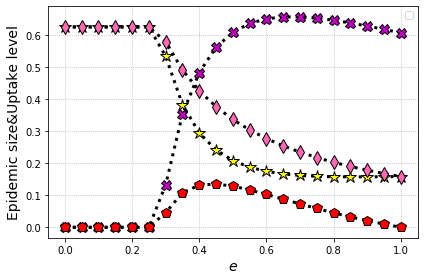

In [3]:
plt.xlabel('$e$', fontsize=14)
#plt.ylabel('Cost in per day', fontsize=14)
plt.ylabel('Epidemic size&Uptake level', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
###x_simu_list
###I1_average_list
###I2_average_list
###FDE_list
'''
plt.plot(eff_list,x_simu_list,color='k',linestyle=':',marker = 'X',markerfacecolor='m',
         markersize = 10,linewidth=3,label='Uptake level')
plt.plot(eff_list,I1_average_list,color='k',linestyle=':',marker = '*',markerfacecolor='yellow',
         markersize = 13,linewidth=3,label='Epidemic size of unvaccinated')
plt.plot(eff_list,I2_average_list,color='k',linestyle=':',marker = 'p',markerfacecolor='r',
        markersize = 10,linewidth=3,label='Epidemic size of vaccinated')
plt.plot(eff_list,FDE_list,color='k',linestyle=':',marker = 'd',markerfacecolor='hotpink',
         markersize = 10,linewidth=3,label='Epidemic size of the population')
'''


plt.plot(eff_list,x_simu_list,color='k',linestyle=':',marker = 'X',markerfacecolor='m',
         markersize = 10,linewidth=3,)
plt.plot(eff_list,I1_average_list,color='k',linestyle=':',marker = '*',markerfacecolor='yellow',
         markersize = 13,linewidth=3,)
plt.plot(eff_list,I2_average_list,color='k',linestyle=':',marker = 'p',markerfacecolor='r',
        markersize = 10,linewidth=3,)
plt.plot(eff_list,FDE_list,color='k',linestyle=':',marker = 'd',markerfacecolor='hotpink',
         markersize = 10,linewidth=3,)
###cost_c_list,cost_v_list,cost_sum_list
'''
plt.plot(eff_list,cost_v_list,color='k',linestyle=':',marker = 'X',markerfacecolor='m',
         markersize = 10,linewidth=3,label='Cost of vaccination')
plt.plot(eff_list,cost_c_list,color='k',linestyle=':',marker = '*',markerfacecolor='yellow',
         markersize = 13,linewidth=3,label='Cost of curing')
plt.plot(eff_list,cost_sum_list,color='k',linestyle=':',marker = 'd',markerfacecolor='hotpink',
         markersize = 10,linewidth=3,label='Cost of vaccination and curing')

'''

plt.legend() 
plt.rcParams['savefig.dpi'] = 1800 
plt.rcParams['figure.dpi'] =1800 
plt.tight_layout()

# 显示图形
#plt.show()
plt.savefig(file_path  = r'E:',fname='figure7_11.jpg')
